<a href="https://colab.research.google.com/github/951237/TIL/blob/master/%EC%9D%B8%EC%82%AC%EC%9E%91%EC%97%85_%EC%A7%80%EC%97%AD%EC%B2%AD_%ED%8C%8C%EC%9D%BC%EC%B7%A8%ED%95%A9_%EB%AA%85%EB%B6%80%EB%A7%8C%EB%93%A4%EA%B8%B0_191213.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지역교육청 제출 파일 정리하기(초빙교사)
- 초빙교사 명부 정리
- 중복교사 삭제
- 000 교사 삭제
- 지역, 성명 소트

## 설정하기

### 구글드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 라이브러리 불러오기

In [2]:
!pip install xlsxwriter

In [0]:
import pandas as pd
import xlsxwriter
import openpyxl
# from datetime import date
import time
import glob

### 파일 경로 설정하기

In [0]:
f_read_cho = '/content/drive/My Drive/data/insa2019/취합_지역청/*.xls'
timestr = time.strftime('%Y%m%d-%H%M%S')
f_write_cho = '/content/drive/My Drive/data/insa2019/insa_result/인사작업_파일취합_초빙명부_{}.xls'.format(timestr)
f_write_delay = '/content/drive/My Drive/data/insa2019/insa_result/인사작업_파일취합_유예자명부_{}.xls'.format(timestr)

## 함수 만들기

### 함수 - 파일불러오기

In [0]:
def read_excel():
    print('파일 불러오는 중...')
    excel_file = glob.glob(f_read_cho)
    return excel_file

### 함수 - 데이터프레임 만들기

In [0]:
def make_df():
    files = read_excel() 
    df = pd.DataFrame()
    sheetWanted = '<양식6>초빙교사명단'
    print('{} 데이터프레임 생성중... '.format(sheetWanted))
    for f in files:
        data = pd.read_excel(f, sheetWanted)
        sel_data = data.iloc[4:]
        df = df.append(sel_data, ignore_index=True)
        print('%s를 쓰는 중...' %(f))
    df.columns = ['구분','지역','학교명','성명','생년월일','초빙_시군','초빙_학교','비고']

    print('파일 %s개 추출완료...' %(len(files)))
    return df

### 함수 - 공란 셀 삭제 및 코드칼럼 만들기

In [0]:
def del_dupl():
    df = make_df()
    
    print('코드 칼럼을 생성 합니다.')
    df['소스_초빙'] = df['지역'] + df['학교명'] + df['성명']

    print('지역, 성명의 빈칸을 삭제 합니다.')
    df.dropna(subset=['지역','성명'], inplace=True)
    df = df.drop_duplicates('소스_초빙')
    return df

### 함수 - 데이터 프레임 정렬 및 빈칸 셀 삭제

In [0]:
def del_blank():
    df = del_dupl()

    print('지역, 성명 순으로 소팅합니다.')
    df.sort_values(by=['지역', '성명'], ascending=[True, True], inplace=True) 
    df.reset_index(drop=True, inplace=True)
    df.index = df.index + 1

    print('성명이 000인 칸을 삭제합니다.')
    df_blank = df[df['성명'] == 'OOO']
    df.drop(df_blank.index, inplace=True)
    return df

### 함수 - 데이터 프레임 정리하기

In [0]:
def clean_df():
    df = del_blank()

    print('구분칼럼을 삭제 시작!')
    df.drop('구분', axis=1, inplace=True)

    print('인덱스 설정을 재설정 시작!')
    df.reset_index(drop=True, inplace=True)
    df.index = df.index + 1

    print('생년월일 소수점을 제거 시작!')    
    df['생년월일'] = df['생년월일'].str.replace('.','')
    return df

### 함수 - 엑셀파일 만들기

In [0]:
def make_excel(df_v):
    df_excel = df_v
    print('엑셀파일 생성중...')
    df_excel.to_excel(f_write_cho)
    print('작업완료..')

def make_excel_temp(df_v, name):
    f_write = '/content/drive/My Drive/data/insa2019/insa_result/{}_{}.xls'.format(name, timestr)
    df_excel = df_v
    print('엑셀파일 생성중...')
    df_excel.to_excel(f_write)
    print('작업완료..')

## 시각화 하기

In [11]:
df = clean_df()

파일 불러오는 중...
<양식6>초빙교사명단 데이터프레임 생성중... 
/content/drive/My Drive/data/insa2019/취합_지역청/가평_가평_구은주_전보내신 취합용(19_12_11).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/고양_1_고양_선종삼_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/광명_광명_김계선_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/광주하남_[붙임1] 초등정기전보내신자료_제출용_(광주하남).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/구리남양주_구리남양주_이현주_전보내신 취합용(19_12_09).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/김포_(붙임1)초등 정기전보 내신자료_취합용_김포.xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/동두천양주_[붙임1] 동두천양주_조성현_전보내신 취합용(19_12_11).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/부천_부천_임영은_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/성남_성남_전희철_전보내신 취합용(19_11_29).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/시흥_시흥_김금란_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/양평_(붙임1)양평_김경록_전보내신 취합

### 라이브러리 블러오기

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 글꼴 설치하기

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

### 글꼴 설정하기

In [0]:
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

### Seaborn을 이용한 간단 시각화

In [15]:
df.columns

Index(['지역', '학교명', '성명', '생년월일', '초빙_시군', '초빙_학교', '비고', '소스_초빙'], dtype='object')

----------------------------------------------------------------------------------------------------
col :  지역



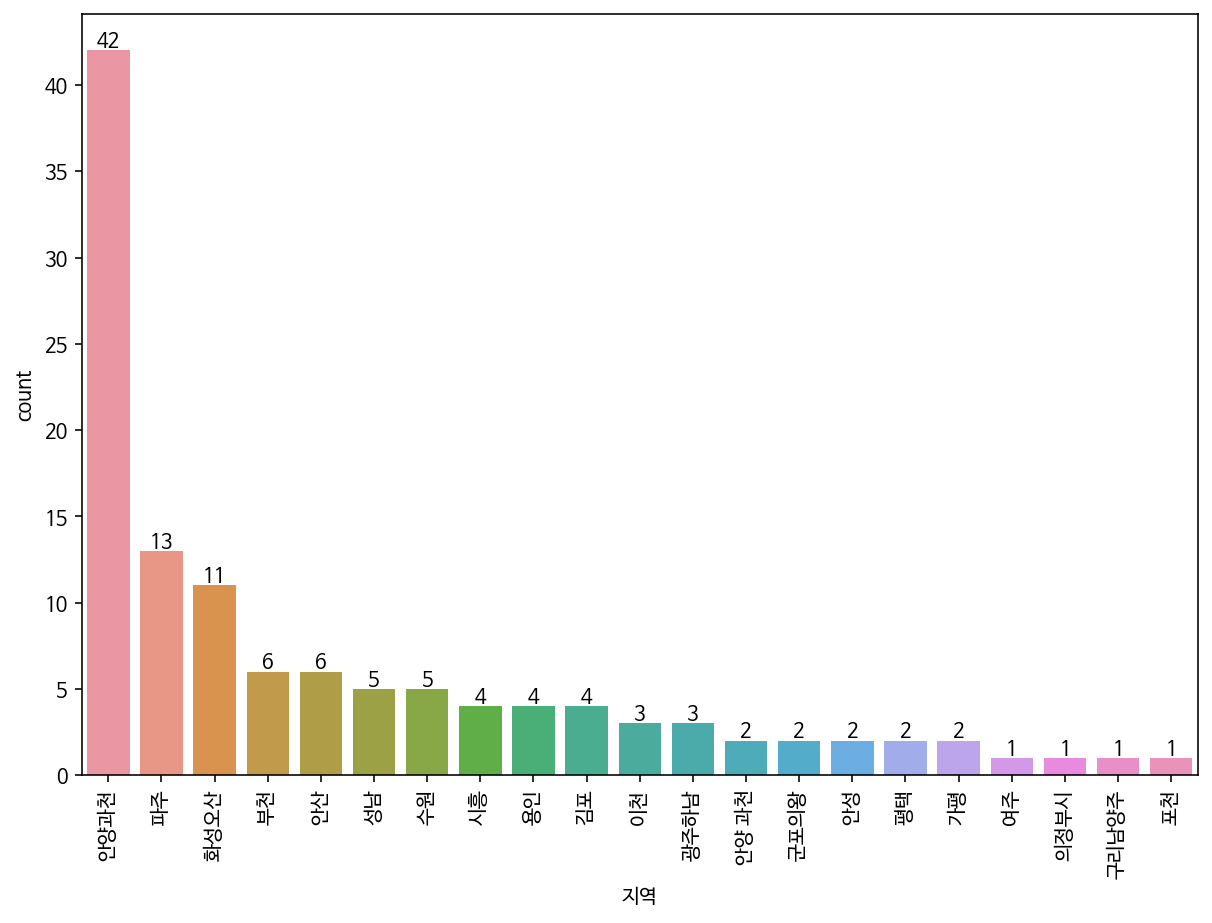

----------------------------------------------------------------------------------------------------
col :  초빙_시군



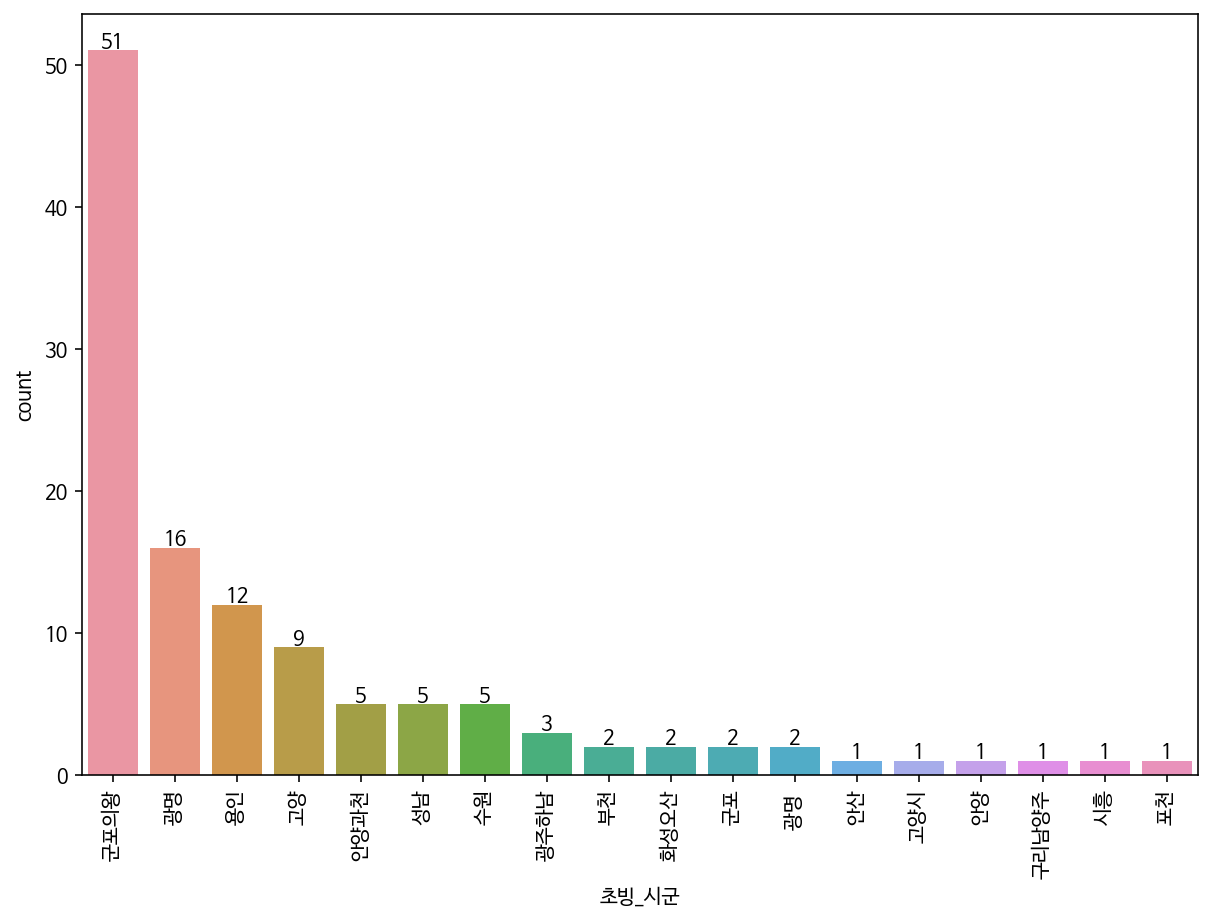

----------------------------------------------------------------------------------------------------
col :  소스_초빙



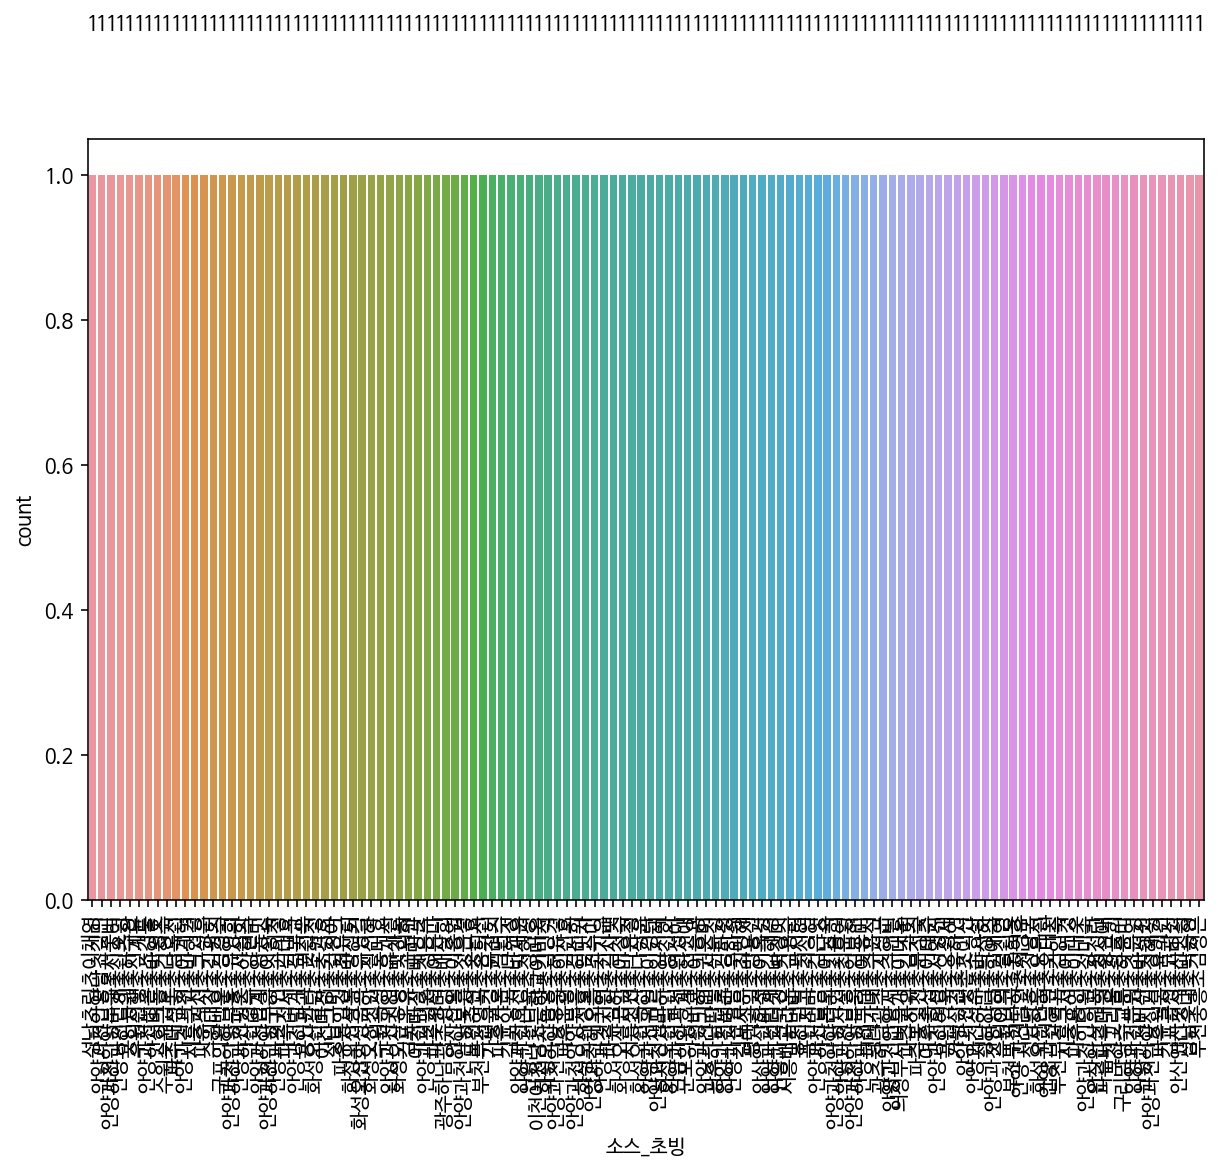

In [16]:
skip_cols = ['학교명', '성명', '생년월일', '초빙_학교', '비고', '코드_학교성명초빙교']
for col in df.columns:
    if col in skip_cols:
        continue
    
    print( '-' * 100)
    print('col : ', col)
    print('')
    f,ax = plt.subplots(figsize = (10,7))
    graph = sns.countplot(x = col, data=df, order=df[col].value_counts().index)

    # 그래프에 값 출력 설정하기
    graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x() + p.get_width()/2., height + 0.2, height, ha = "center")
    plt.show()

## 실행문

### 데이터 프레임 생성하기

In [17]:
df = clean_df()

파일 불러오는 중...
<양식6>초빙교사명단 데이터프레임 생성중... 
/content/drive/My Drive/data/insa2019/취합_지역청/가평_가평_구은주_전보내신 취합용(19_12_11).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/고양_1_고양_선종삼_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/광명_광명_김계선_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/광주하남_[붙임1] 초등정기전보내신자료_제출용_(광주하남).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/구리남양주_구리남양주_이현주_전보내신 취합용(19_12_09).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/김포_(붙임1)초등 정기전보 내신자료_취합용_김포.xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/동두천양주_[붙임1] 동두천양주_조성현_전보내신 취합용(19_12_11).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/부천_부천_임영은_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/성남_성남_전희철_전보내신 취합용(19_11_29).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/시흥_시흥_김금란_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/양평_(붙임1)양평_김경록_전보내신 취합

### 엑셀파일 취합후 엑셀파일 생성하기

In [18]:
make_excel(df)

엑셀파일 생성중...
작업완료..


# 유예자 명단 만들기

In [0]:
def read_excel():
    print('파일 불러오는 중...')
    excel_file = glob.glob(f_read_cho)
    return excel_file

In [0]:
def make_df_delay():
    files = read_excel() 
    df_delay = pd.DataFrame()
    sheetWanted = '<양식9>유예자명단'
    print('{} 데이터프레임 생성중... '.format(sheetWanted))
    for f in files:
        data = pd.read_excel(f, sheetWanted)
        sel_data = data.iloc[5:]
        df_delay = df_delay.append(sel_data, ignore_index=True)
        print('%s를 쓰는 중...' %(f))
    df_delay.columns = ['지역','근무년수','휴직(파견)년수','유예유형','유예규정','유예사유','근무성적','비고','비고1','학교명','인사구역','직위','성명','성별','생년월일','나이','발령일자','구분']

    print('파일 %s개 추출완료...' %(len(files)))
    return df_delay

In [0]:
def del_dupl_delay():
    df_delay = make_df_delay()
    
    print('코드 칼럼을 생성 합니다.')
    df_delay['소스_유예'] = df_delay['지역'] + df_delay['학교명'] + df_delay['성명']

    print('지역, 성명의 빈칸을 삭제 합니다.')
    df_delay.dropna(subset=['지역','성명'], inplace=True)
    # df_delay = df_delay.drop_duplicates('소스_유예')
    return df_delay

In [0]:
def del_blank_delay():
    df_delay = del_dupl_delay()

    print('지역, 성명 순으로 소팅합니다.')
    df_delay.sort_values(by=['지역', '성명'], ascending=[True, True], inplace=True) 
    df_delay.reset_index(drop=True, inplace=True)
    df_delay.index = df_delay.index + 1

    print('성명이 000인 칸을 삭제합니다.')
    df_delay_blank = df_delay[df_delay['성명'] == 'OOO']
    df_delay = df_delay.drop(df_delay_blank.index)
    return df_delay

In [0]:
def clean_df_delay():
    df_delay = del_blank_delay()

    print('구분칼럼을 삭제 시작!')
    df_delay.drop('구분', axis=1, inplace=True)

    print('인덱스 설정을 재설정 시작!')
    df_delay.reset_index(drop=True, inplace=True)
    df_delay.index = df_delay.index + 1

    print('생년월일 소수점을 제거 시작!')    
    df_delay['생년월일'] = df_delay['생년월일'].str.replace('.','')

    print('칼럼 재 정렬!')    
    df_delay = df_delay[['지역', '학교명', '인사구역', '성명', '직위', '성별', '생년월일', '나이', '발령일자', '근무년수', '근무성적', '휴직(파견)년수', '유예유형', '유예규정', '유예사유', '비고', '비고1', '소스_유예', ]]

    return df_delay

In [0]:
def make_excel(df_v):
    df_excel = df_v
    print('엑셀파일 생성중...')
    df_excel.to_excel(f_write_delay)
    print('작업완료..')

def make_excel_temp(df_v, name):
    f_write = '/content/drive/My Drive/data/insa2019/insa_result/{}_{}.xls'.format(name, timestr)
    df_excel = df_v
    print('엑셀파일 생성중...')
    df_excel.to_excel(f_write)
    print('작업완료..')

In [25]:
df_delay = clean_df_delay()
make_excel(df_delay)

파일 불러오는 중...
<양식9>유예자명단 데이터프레임 생성중... 
/content/drive/My Drive/data/insa2019/취합_지역청/가평_가평_구은주_전보내신 취합용(19_12_11).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/고양_1_고양_선종삼_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/광명_광명_김계선_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/광주하남_[붙임1] 초등정기전보내신자료_제출용_(광주하남).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/구리남양주_구리남양주_이현주_전보내신 취합용(19_12_09).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/김포_(붙임1)초등 정기전보 내신자료_취합용_김포.xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/동두천양주_[붙임1] 동두천양주_조성현_전보내신 취합용(19_12_11).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/부천_부천_임영은_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/성남_성남_전희철_전보내신 취합용(19_11_29).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/시흥_시흥_김금란_전보내신 취합용(19_12_12).xls를 쓰는 중...
/content/drive/My Drive/data/insa2019/취합_지역청/양평_(붙임1)양평_김경록_전보내신 취합용

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# 보건 명부 취합
- 폴더내 파일 가져오기


## 설정하기 

In [0]:
f_read_med = '/content/drive/My Drive/data/insa2019/취합_보건/*.xlsx'
timestr = time.strftime('%Y%m%d-%H%M%S')
f_write_med = '/content/drive/My Drive/data/insa2019/insa_result/인사작업_파일취합_보건명부_{}.xls'.format(timestr)

## 함수 만들기

### 함수 - 엑셀파일 읽어오기

In [0]:
def read_excel_med():
    print('파일 불러오는 중...')
    excel_file = glob.glob(f_read_med)
    return excel_file

### 함수 - 보건 데이터 프레임 만들기

In [0]:
def make_df_med():
    files = read_excel_med()
    
    use_cols = (2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26)
    header_name = ['1희망', '지역', '소속', '성명', '주민번호', '성별', '전임교_학교명', '전임교_인사구역', '전임교_발령일자', '전임교_근무년수', '현임교_학교명', '현임교_인사구역', '현임교_발령일자', '현임교_근무년수', '가점_지역', '가점_부부', '가점_업무', '가점_기타', '가산_계', '전보총점', '근무성적', '우대사항', '특기사항']

    df = pd.DataFrame()
    for f in files:
        df_temp = pd.read_excel(f, header = None, usecols = use_cols ).iloc[9:,:]
        df = df.append(df_temp)
        print('{} 쓰는 중. . .  '.format(f))
    
    print('{}개의 파일 추출 완료!'.format(len(files)))
    df.columns = header_name
    df = df.reset_index(drop=True)

    df.dropna(subset=['성명', '소속'], inplace=True)

    df.index = df.index + 1

    return df

### 함수 - 엑셀 파일 쓰기

In [0]:
def make_excel(df_v):
    df_excel = df_v
    print('엑셀파일 생성중...')
    df_excel.to_excel(f_write_med)
    print('작업완료..')

## 실행문

In [30]:
df_med = make_df_med()
make_excel(df_med)

파일 불러오는 중...
/content/drive/My Drive/data/insa2019/취합_보건/가평_2020.3.1.자 초등보건 정기전보 명부(가평).xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/광명_갑구역만기전보 내신자 명부(광명보건교사).xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/군포의왕_보건교사.xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/광주하남_붙임2-3 일반(비교과)내신자명부(광주하남).xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/안양과천_전보내신자 명부(만기-보건).xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/양평_(붙임2-2)전보내신자 명부(양평-보건).xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/수원_보건교사.xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/동두천양주_붙임3 동두천양주_전보내신자 명부파일(보건교사).xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/안산_보건.xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/이천_2020.3.1.자 비교과 내신자명부(보건3).xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/화성오산_보건교사 내신자 명단_화성오산.xlsx 쓰는 중. . .  
/content/drive/My Drive/data/insa2019/취합_보건/평택_보건.xlsx 쓰는 중. . .  
/conten

In [31]:
df_med.head()

,1희망,지역,소속,성명,주민번호,성별,전임교_학교명,전임교_인사구역,전임교_발령일자,전임교_근무년수,현임교_학교명,현임교_인사구역,현임교_발령일자,현임교_근무년수,가점_지역,가점_부부,가점_업무,가점_기타,가산_계,전보총점,근무성적,우대사항,특기사항
1,구리남양주,가평,미원초,나성미,840114-2151811,여,NaN,NaN,NaN,NaN,미원초,을지,2014.03.01,2.05,1.02,0,0.06,.,.,5.03,86.15,11조1항,"휴직 3.07년, 2명의 영유아-김도현 5세, 김예나 3세"
2,안양과천,군포의왕,당동초,안희숙,711201-2558725,여,NaN,NaN,NaN,NaN,당동초,갑지,2015.03.01,5,0,0,4,0,4,9,92.02,11조1항,NaN
3,부천,군포의왕,의왕부곡초,유길영,750225-2668011,여,NaN,NaN,NaN,NaN,의왕부곡초,갑지,2017.03.01,2,0,0,1,0,1,3,86.14,11조1항,NaN
4,성남,광주하남,곤지암초,조영순,710401-2006127,여,NaN,NaN,NaN,NaN,곤지암초,을지,2017.03.01,3,1.06,0,1,0,2.06,5.06,94.09,11조1항,NaN
5,양평,광주하남,하남초,정진수,761011-2649112,여,NaN,NaN,NaN,NaN,하남초,갑지,2015.03.01,5,0,0,0,0.01,0.01,5.01,92.74,13조5항,NaN


In [32]:
df_med['지역'].value_counts()

파주       6
평택       6
광주하남     5
화성오산     5
안양과천     4
안산       3
동두천양주    3
이천       3
양평       3
수원       2
김포       2
군포의왕     2
가평       1
포천       1
Name: 지역, dtype: int64

# 통계센터

## 초빙교사

In [33]:
df.head()

,지역,학교명,성명,생년월일,초빙_시군,초빙_학교,비고,소스_초빙
1,가평,상천초,유하연,790711,용인,현암초,NaN,가평상천초유하연
2,가평,율길초,윤찬희,730119,구리남양주,남양주월문초,NaN,가평율길초윤찬희
3,광주하남,광주광명초,배상희,710324,성남,판교초,NaN,광주하남광주광명초배상희
4,광주하남,탄벌초,신순정,771227,성남,성남초,NaN,광주하남탄벌초신순정
5,광주하남,광주초,지정근,641029,성남,성남초,NaN,광주하남광주초지정근


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 1 to 120
Data columns (total 8 columns):
지역       120 non-null object
학교명      120 non-null object
성명       120 non-null object
생년월일     103 non-null object
초빙_시군    120 non-null object
초빙_학교    120 non-null object
비고       1 non-null object
소스_초빙    120 non-null object
dtypes: object(8)
memory usage: 7.6+ KB


In [35]:
df_cho = df.copy()
df_cho.shape

(120, 8)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
df_cho.head(2)

,지역,학교명,성명,생년월일,초빙_시군,초빙_학교,비고,소스_초빙
1,가평,상천초,유하연,790711,용인,현암초,NaN,가평상천초유하연
2,가평,율길초,윤찬희,730119,구리남양주,남양주월문초,NaN,가평율길초윤찬희


In [37]:
df_cho.columns

Index(['지역', '학교명', '성명', '생년월일', '초빙_시군', '초빙_학교', '비고', '소스_초빙'], dtype='object')

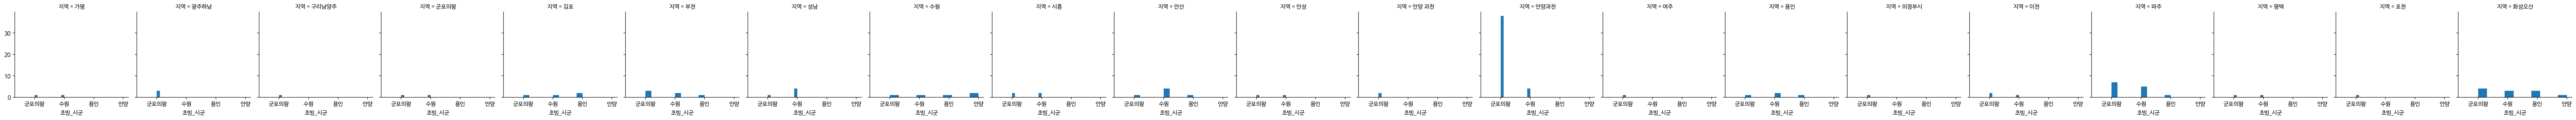

In [54]:
g = sns.FacetGrid(df_cho, col = '지역', margin_titles=True)
g.map(plt.hist, "초빙_시군")

In [72]:
c_cho = pd.crosstab(df_cho['지역'], df_cho['초빙_시군'])
c_cho

초빙_시군,고양,고양시,광명,광명,광주하남,구리남양주,군포,군포의왕,부천,성남,수원,시흥,안산,안양,안양과천,용인,포천,화성오산
지역,,,,,,,,,,,,,,,,,,
가평,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
광주하남,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
구리남양주,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
군포의왕,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
김포,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
부천,1,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
성남,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0
수원,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1
시흥,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


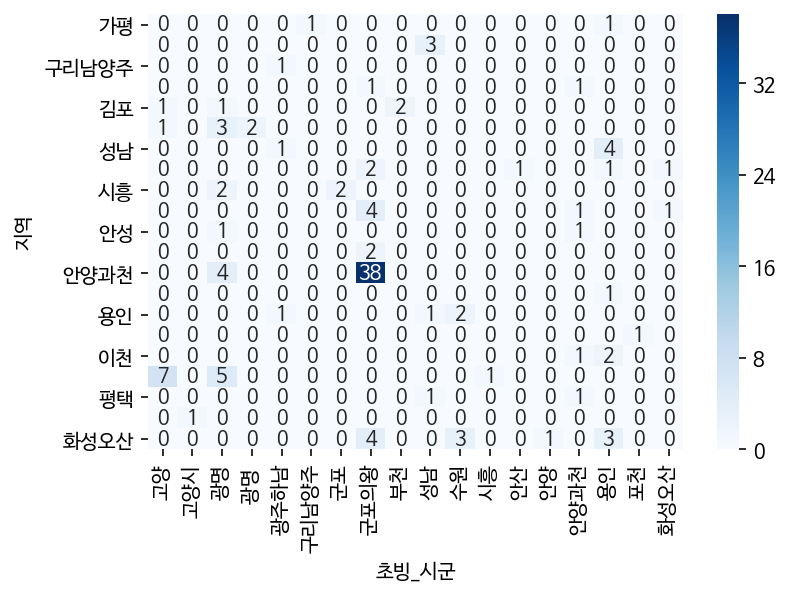

In [75]:
sns.heatmap(c_cho, annot=True, cmap='Blues')

## 유예교사

In [56]:
df_delay.head()

,지역,학교명,인사구역,성명,직위,성별,생년월일,나이,발령일자,근무년수,근무성적,휴직(파견)년수,유예유형,유예규정,유예사유,비고,비고1,소스_유예
1,고양,대화초,갑,강대원,초등교사,남,NaN,51,2015.03.01,5,수,NaN,학교,제11조제4항제1호,교육활동에 직접적으로 공헌,NaN,NaN,고양대화초강대원
2,고양,소만초,갑,강윤심,초등교사,여,NaN,43,2015.03.01,5,수,NaN,학교,제11조제4항제1호,교육활동에 직접적으로 공헌,NaN,NaN,고양소만초강윤심
3,고양,일산초,갑,강혜진,초등교사,여,NaN,42,2015.03.01,5,우,NaN,학교,제11조제4항제1호,교육활동에 직접적으로 공헌,NaN,NaN,고양일산초강혜진
4,고양,고양동산초,갑,권나영,초등교사,여,NaN,30,2014.03.10,5.11,수,NaN,학교,제11조제4항제1호,교육활동에 직접적으로 공헌,NaN,NaN,고양고양동산초권나영
5,고양,고양백석초,갑,김경숙,초등교사,여,NaN,48,2015.03.01,5,NaN,NaN,구역,제18조제5항,교과전담,NaN,NaN,고양고양백석초김경숙


In [57]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 1 to 594
Data columns (total 18 columns):
지역          594 non-null object
학교명         594 non-null object
인사구역        578 non-null object
성명          594 non-null object
직위          578 non-null object
성별          578 non-null object
생년월일        34 non-null object
나이          573 non-null object
발령일자        593 non-null object
근무년수        524 non-null object
근무성적        153 non-null object
휴직(파견)년수    341 non-null object
유예유형        594 non-null object
유예규정        580 non-null object
유예사유        594 non-null object
비고          196 non-null object
비고1         1 non-null object
소스_유예       594 non-null object
dtypes: object(18)
memory usage: 83.7+ KB


In [58]:
df_delay_plot = df_delay.copy()
df_delay_plot.shape

(594, 18)

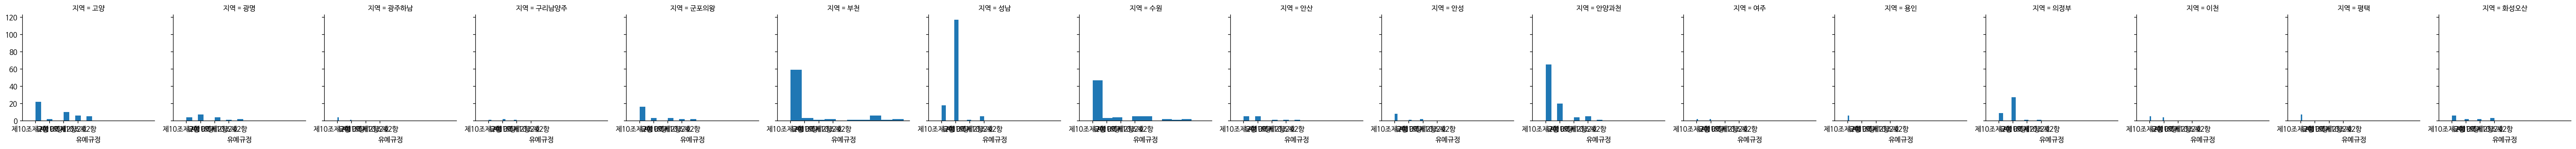

In [68]:
g = sns.FacetGrid(df_delay_plot, col = '지역', margin_titles=True)
g.map(plt.hist, '유예규정')

In [0]:
g = sns.FacetGrid(df_delay, col = '지역', margin_titles=True)
g.map()

In [0]:
c = pd.crosstab(df_delay['지역'], df_delay['유예규정'])

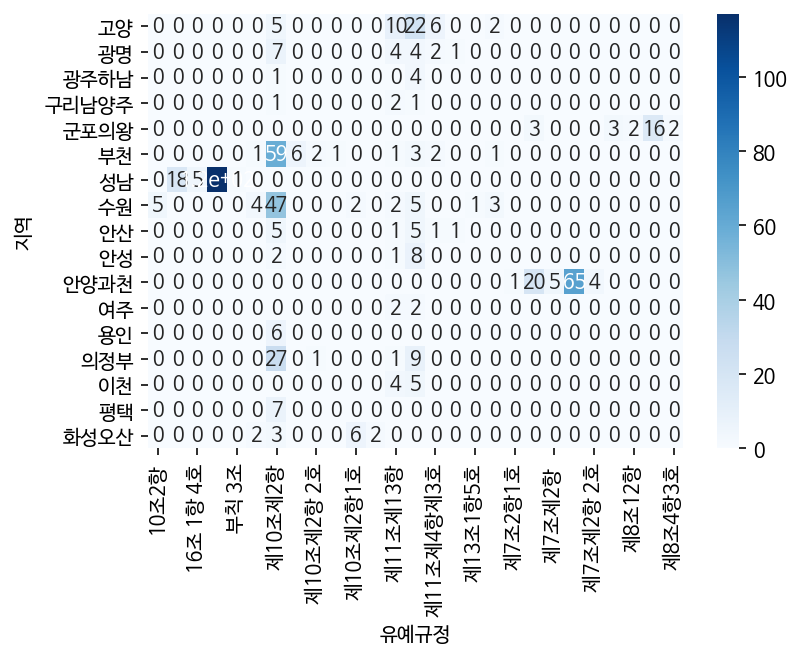

In [71]:
sns.heatmap(c, annot=True, cmap = 'Blues')

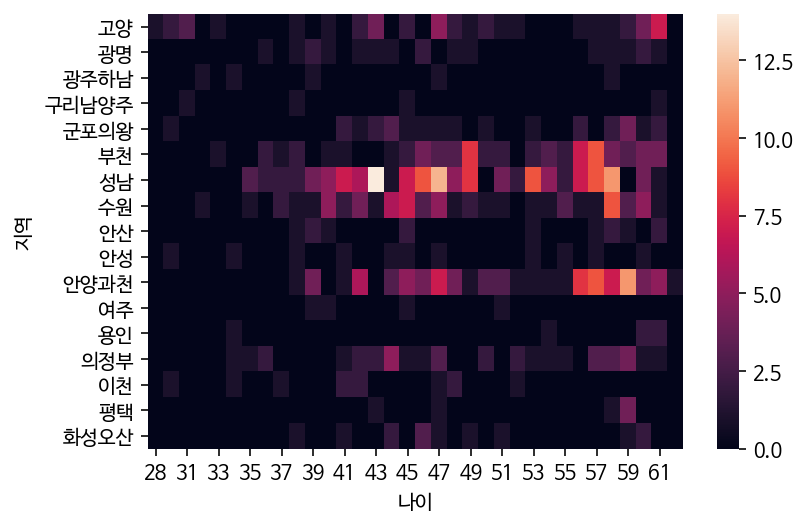

In [76]:
c = pd.crosstab(df_delay['지역'], df_delay['나이'])
sns.heatmap(c)

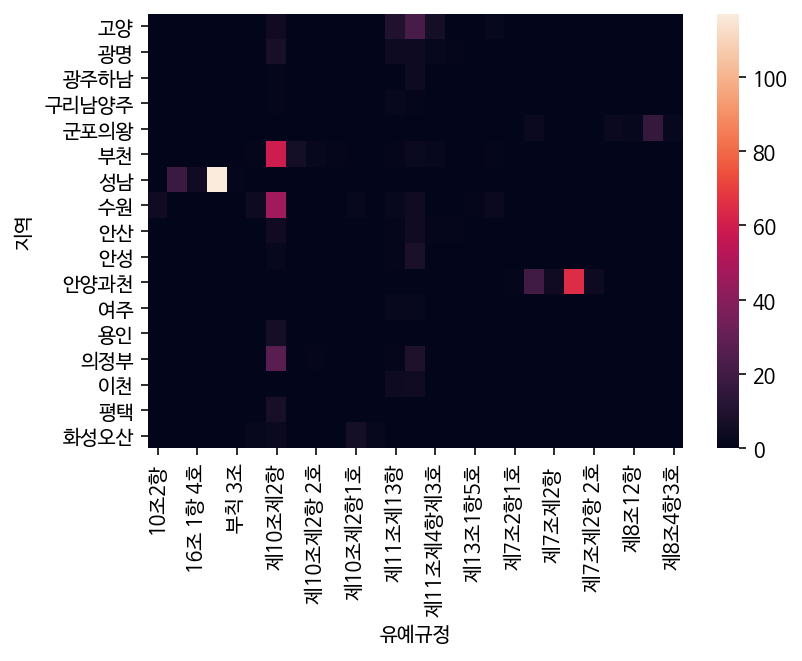

In [77]:
c = pd.crosstab(df_delay['지역'], df_delay['유예규정'])
sns.heatmap(c)

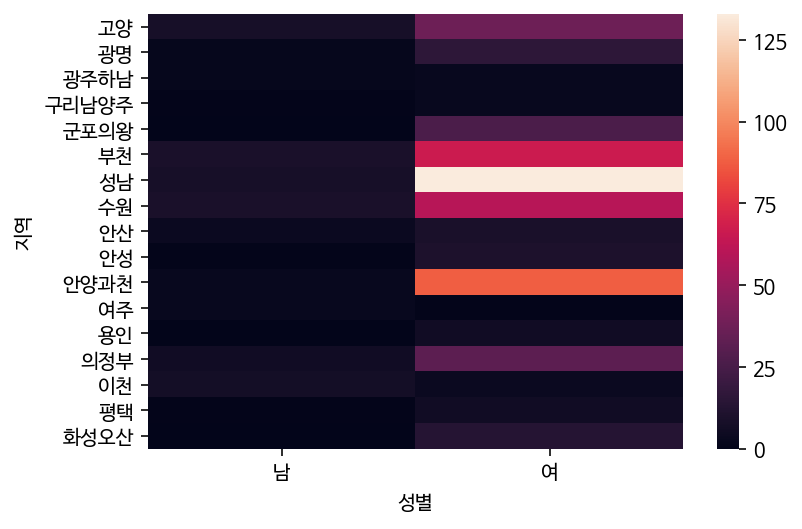

In [78]:
c = pd.crosstab(df_delay['지역'], df_delay['성별'])
sns.heatmap(c)

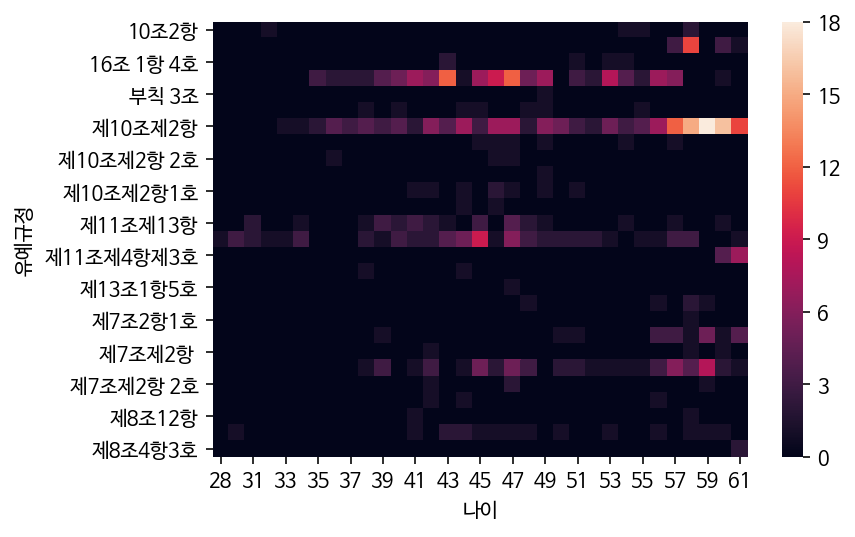

In [80]:
c = pd.crosstab(df_delay['유예규정'], df_delay['나이'])
sns.heatmap(c)

## 비교과

In [81]:
df_med.head(2)

,1희망,지역,소속,성명,주민번호,성별,전임교_학교명,전임교_인사구역,전임교_발령일자,전임교_근무년수,현임교_학교명,현임교_인사구역,현임교_발령일자,현임교_근무년수,가점_지역,가점_부부,가점_업무,가점_기타,가산_계,전보총점,근무성적,우대사항,특기사항
1,구리남양주,가평,미원초,나성미,840114-2151811,여,NaN,NaN,NaN,NaN,미원초,을지,2014.03.01,2.05,1.02,0,0.06,.,.,5.03,86.15,11조1항,"휴직 3.07년, 2명의 영유아-김도현 5세, 김예나 3세"
2,안양과천,군포의왕,당동초,안희숙,711201-2558725,여,NaN,NaN,NaN,NaN,당동초,갑지,2015.03.01,5,0,0,4,0,4,9,92.02,11조1항,NaN


In [82]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 54
Data columns (total 23 columns):
1희망         42 non-null object
지역          46 non-null object
소속          46 non-null object
성명          46 non-null object
주민번호        46 non-null object
성별          37 non-null object
전임교_학교명     4 non-null object
전임교_인사구역    4 non-null object
전임교_발령일자    4 non-null object
전임교_근무년수    13 non-null object
현임교_학교명     46 non-null object
현임교_인사구역    42 non-null object
현임교_발령일자    46 non-null object
현임교_근무년수    46 non-null object
가점_지역       46 non-null object
가점_부부       46 non-null object
가점_업무       46 non-null object
가점_기타       41 non-null object
가산_계        46 non-null object
전보총점        44 non-null object
근무성적        33 non-null object
우대사항        33 non-null object
특기사항        11 non-null object
dtypes: object(23)
memory usage: 8.6+ KB


In [83]:
df_med.columns

Index(['1희망', '지역', '소속', '성명', '주민번호', '성별', '전임교_학교명', '전임교_인사구역',
       '전임교_발령일자', '전임교_근무년수', '현임교_학교명', '현임교_인사구역', '현임교_발령일자', '현임교_근무년수',
       '가점_지역', '가점_부부', '가점_업무', '가점_기타', '가산_계', '전보총점', '근무성적', '우대사항',
       '특기사항'],
      dtype='object')

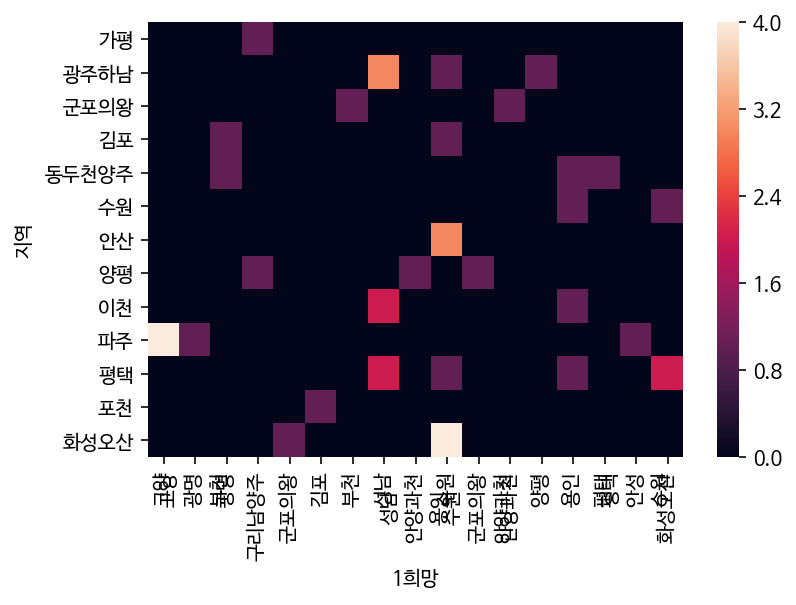

In [84]:
c_med = pd.crosstab(df_med['지역'], df_med['1희망'])
sns.heatmap(c_med)

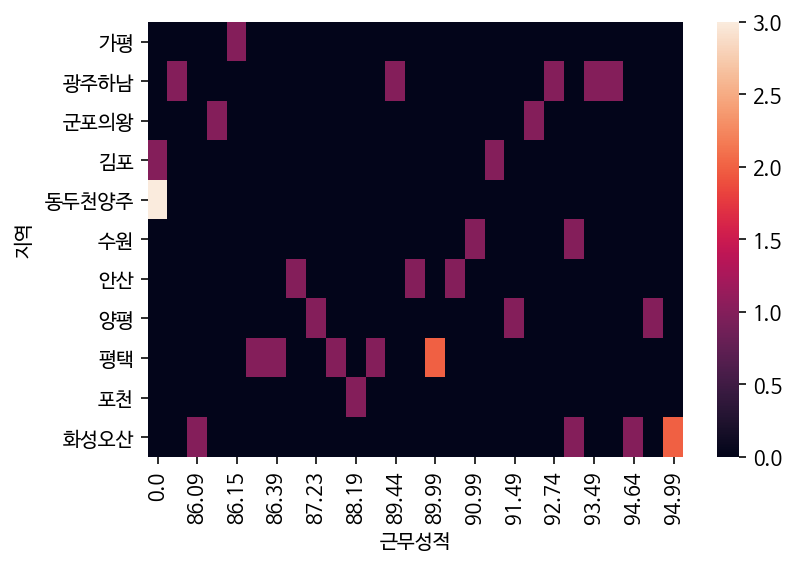

In [85]:
c_med = pd.crosstab(df_med['지역'], df_med['근무성적'])
sns.heatmap(c_med)

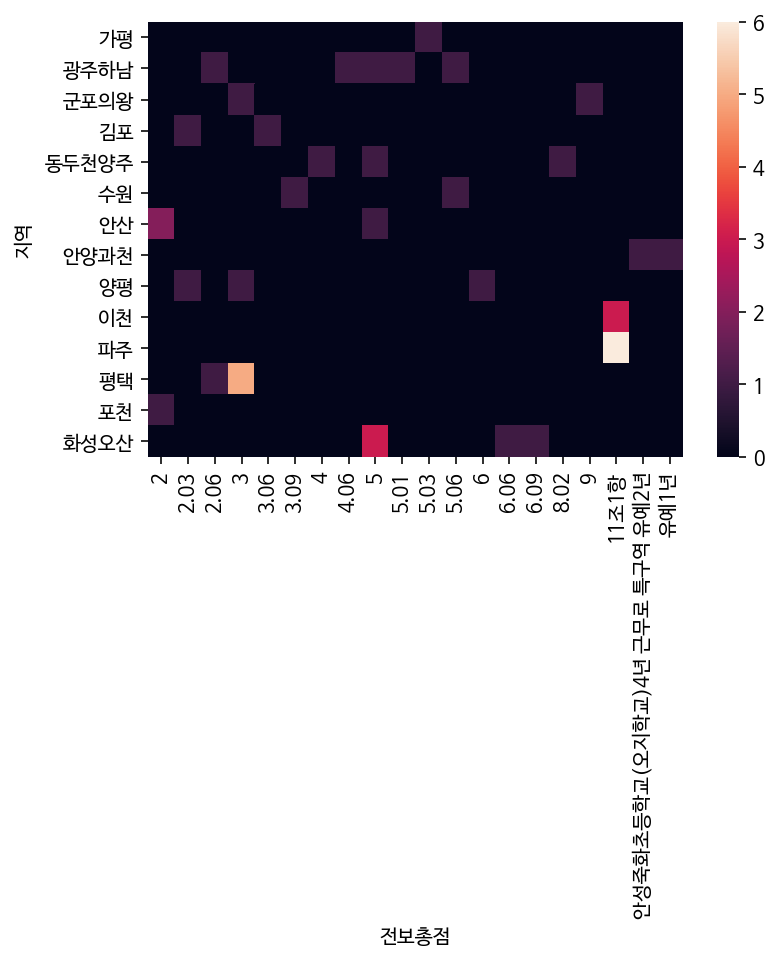

In [86]:
c_med = pd.crosstab(df_med['지역'], df_med['전보총점'])
sns.heatmap(c_med)

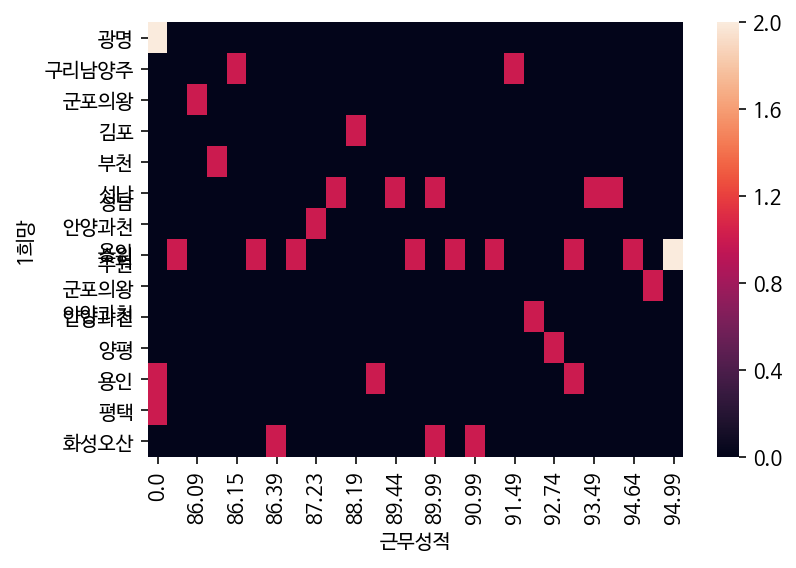

In [87]:
c_med = pd.crosstab(df_med['1희망'], df_med['근무성적'])
sns.heatmap(c_med)

# TIL

## 191214 생년월일에서 마침표 삭제하기

In [39]:
df['생년월일'].str.replace('.','')

1      790711
2      730119
3      710324
4      771227
5      641029
        ...  
116    810630
117    720420
118    781024
119    791204
120    740407
Name: 생년월일, Length: 120, dtype: object

## 191217 초빙명단 딕셔너리 만들기 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 1 to 120
Data columns (total 8 columns):
지역       120 non-null object
학교명      120 non-null object
성명       120 non-null object
생년월일     103 non-null object
초빙_시군    120 non-null object
초빙_학교    120 non-null object
비고       1 non-null object
소스_초빙    120 non-null object
dtypes: object(8)
memory usage: 7.6+ KB


In [41]:
df_dic = df.copy()
df_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 1 to 120
Data columns (total 8 columns):
지역       120 non-null object
학교명      120 non-null object
성명       120 non-null object
생년월일     103 non-null object
초빙_시군    120 non-null object
초빙_학교    120 non-null object
비고       1 non-null object
소스_초빙    120 non-null object
dtypes: object(8)
memory usage: 7.6+ KB


In [42]:
df_dic[ df_dic['생년월일'].isnull() ] # Nan 값 찾기

,지역,학교명,성명,생년월일,초빙_시군,초빙_학교,비고,소스_초빙
29,시흥,배곧라온초,김용순,NaN,광명,광문초,NaN,시흥배곧라온초김용순
30,시흥,신천초,박은정,NaN,광명,광문초,NaN,시흥신천초박은정
31,시흥,군자초,박현경,NaN,군포,군포초,NaN,시흥군자초박현경
32,시흥,군서초,이연경,NaN,군포,관모초,NaN,시흥군서초이연경
94,파주,적서초,구성훈,NaN,고양,금계초,NaN,파주적서초구성훈
95,파주,적서초,김대호,NaN,광명,광명초,NaN,파주적서초김대호
96,파주,가온초,김면수,NaN,광명,안현초,NaN,파주가온초김면수
97,파주,심학초,김사백,NaN,광명,광명광성초,NaN,파주심학초김사백
98,파주,자유초,김수희,NaN,광명,광명철산초,NaN,파주자유초김수희
99,파주,대성동초,남옥선,NaN,광명,광명초,NaN,파주대성동초남옥선


In [43]:
df_dic_code = df_dic['소스_초빙']
df_dic_code

1          가평상천초유하연
2          가평율길초윤찬희
3      광주하남광주광명초배상희
4        광주하남탄벌초신순정
5        광주하남광주초지정근
           ...     
116    화성오산화성금곡초유영길
117      화성오산금암초이정숙
118      화성오산성호초임민자
119      화성오산갈담초조현정
120      화성오산진안초진선하
Name: 소스_초빙, Length: 120, dtype: object

In [44]:
make_excel_temp(df_dic_code, '소스_초빙')

엑셀파일 생성중...
작업완료..


## 191217 Nan 값 찾기



```
df_dic[ df_dic['생년월일'].isnull() ]
```


In [45]:
df_med[ df_med['지역'] == '' ]

,1희망,지역,소속,성명,주민번호,성별,전임교_학교명,전임교_인사구역,전임교_발령일자,전임교_근무년수,현임교_학교명,현임교_인사구역,현임교_발령일자,현임교_근무년수,가점_지역,가점_부부,가점_업무,가점_기타,가산_계,전보총점,근무성적,우대사항,특기사항
